Step 1: Load Libraries And Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [44]:
df = pd.read_csv('student-mat.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Step 2: Data Exploration

In [45]:
# Check for missing values
print(df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [46]:
# Display column data types
print(df.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [47]:
# Understand the dataset size
print(f"Dataset shape: {df.shape}")

Dataset shape: (395, 33)


Step 3: Data Cleaning


In [13]:
# Remove duplicate entries
df.drop_duplicates(inplace=True)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


Step 4: Data Analysis Questions

In [21]:
# What is the average score in math (G3)?
avg_score = df['G3'].mean()
print(f"The average score in math (G3): {avg_score}")

The average score in math (G3): 10.415189873417722


In [22]:
# How many students scored above 15 in their final grade (G3)?
above_15_count = df[df['G3'] > 15].shape[0]
print(f"Number of students who scored above 15: {above_15_count}")

Number of students who scored above 15: 40


In [25]:
# Is there a correlation between study time and the final grade (G3)?
correlation = df['studytime'].corr(df['G3'])
print(f"Correlation between study time and final grade (G3): {correlation}")

Correlation between study time and final grade (G3): 0.09781968965319636


In [26]:
# Which gender has a higher average final grade (G3)?
avg_grade_by_gender = df.groupby('sex')['G3'].mean()
print(avg_grade_by_gender)

sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


Step 5: Data Visualisation

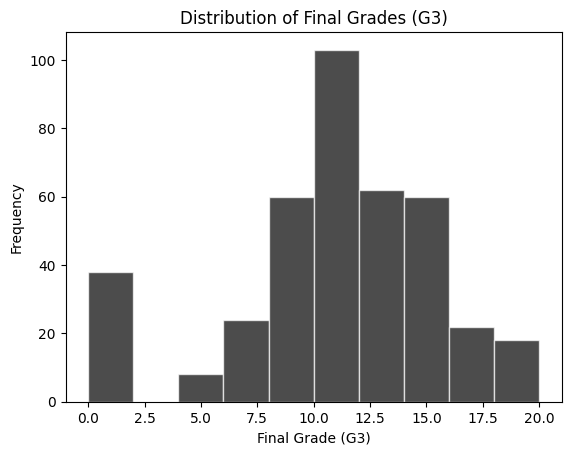

In [48]:
# Plot a histogram of final grades (G3):

import matplotlib.pyplot as plt

plt.hist(df['G3'], bins=10, color='black', alpha=0.7, edgecolor='white')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

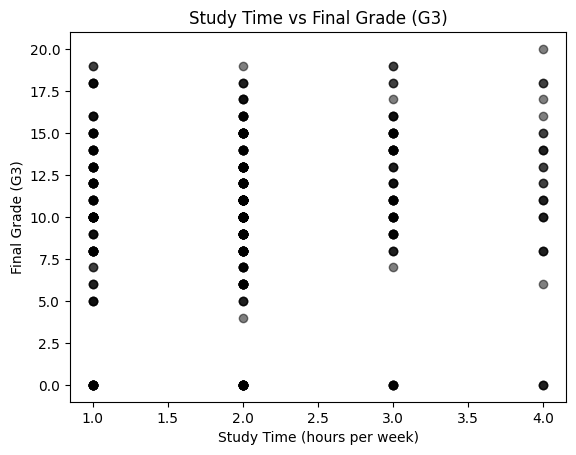

In [31]:
# Create a scatter plot between study time and final grade (G3):

plt.scatter(df['studytime'], df['G3'], alpha=0.5, color='black')
plt.title('Study Time vs Final Grade (G3)')
plt.xlabel('Study Time (hours per week)')
plt.ylabel('Final Grade (G3)')
plt.show()

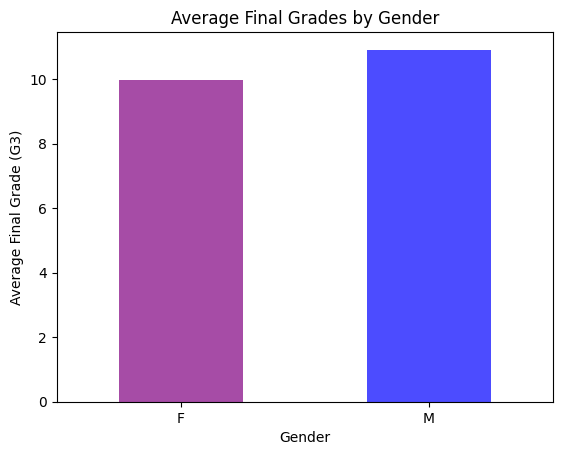

In [49]:
# Create a bar chart comparing the average scores of male and female students:

avg_grade_by_gender.plot(kind='bar', color=['purple','blue'], alpha=0.7)
plt.title('Average Final Grades by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Final Grade (G3)')
plt.xticks(rotation=0)
plt.show()